## Primeros pasos

In [ ]:
pip install tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras.preprocessing import image
import glob
import shutil
import os
from PIL import Image


In [ ]:
df_train = pd.read_csv('Datos\\Training_Set\\Training_Labels.csv')
df_train
# se leen los datos

In [ ]:
df_validation = pd.read_csv('Datos\\Evaluation_Set\\Validation_Labels.csv')
df_validation

#Dos de ellas no me sirven que serian ID y Disease Risk Se hara despues con estas
#df_validation = df_validation.drop(['ID', 'Disease_Risk'], axis=1)
#df_validation

In [ ]:
df_test = pd.read_csv('Datos\\Test_Set\\Testing_Labels.csv')
df_test
#Dos de ellas no me sirven que serian ID y Disease Risk Se hara despues con estas
#df_test = df_test.drop(['ID', 'Disease_Risk'], axis=1)
#df_test

In [ ]:
#Dos de ellas no me sirven que serian ID y Disease Risk
df_train = df_train.drop(['ID', 'Disease_Risk'], axis=1)
df_train

In [ ]:
def revisar_enfermedad(df):
    disease_name, zeroCount, oneCount = [], [], []
    rowLen = len(df)
    for (column_name, column) in df.iteritems():
        disease_name.append(column_name)    
        zeroCount.append(df[column_name].value_counts()[0])
    oneCount = [rowLen - x for x in zeroCount]
    
    return disease_name, zeroCount, oneCount

# Insert the image ID
def img_id(df,num):
    id_list = []
    for i in range(num):
        id_list.append(i+1)
    df.insert(0,'ID',id_list)

In [ ]:
dicRetino

In [ ]:
disease_name, zeroCount, oneCount = revisar_enfermedad(df_train)

fig = plt.figure(figsize=(30, 20))
plt.bar(disease_name, oneCount, width=0.6, color=['skyblue'])
plt.xlabel('Disease Name')
plt.show()

dicRetino = {}
for i in range(len(disease_name)):
    print(str(disease_name[i]) + ' aparece: '+ str(oneCount[i]))
    dicRetino[disease_name[i]] = oneCount[i]
    # no esta de mayor a menor sad

* DR aparece: 376 
* ARMD aparece: 100
* MH aparece: 317
* DN aparece: 138
* MYA aparece: 101
* BRVO aparece: 73
* TSLN aparece: 186
* ERM aparece: 14
* LS aparece: 47
* MS aparece: 15
* CSR aparece: 37
* ODC aparece: 282
* CRVO aparece: 28
* TV aparece: 6
* AH aparece: 16
* ODP aparece: 65
* ODE aparece: 58
* ST aparece: 5
* AION aparece: 17
* PT aparece: 11
* RT aparece: 14
* RS aparece: 43
* CRS aparece: 32
* EDN aparece: 15
* RPEC aparece: 22
* MHL aparece: 11
* RP aparece: 6
* CWS aparece: 3
* CB aparece: 1
* ODPM aparece: 0
* PRH aparece: 2
* MNF aparece: 3
* HR aparece: 0
* CRAO aparece: 2
* TD aparece: 3
* CME aparece: 4
* PTCR aparece: 5
* CF aparece: 3
* VH aparece: 1
* MCA aparece: 1
* VS aparece: 1
* BRAO aparece: 2
* PLQ aparece: 1
* HPED aparece: 1
* CL aparece: 1

In [ ]:
type(dicRetino)
sort_dicRetino = sorted(dicRetino.items(), key=lambda x:x[1], reverse=True)
sort_dicRetino = dict(sort_dicRetino)
sort_dicRetino

In [ ]:
{'DR': 376,
 'MH': 317,
 'ODC': 282,
 'TSLN': 186,
 'DN': 138,
 'MYA': 101,
 'ARMD': 100,
 'BRVO': 73,
 'ODP': 65,
 'ODE': 58,
 'LS': 47,
 'RS': 43,
 'CSR': 37,
 'CRS': 32,
 'CRVO': 28,
 'RPEC': 22,
 'AION': 17,
 'AH': 16,
 'MS': 15,
 'EDN': 15,
 'ERM': 14,
 'RT': 14,
 'PT': 11,
 'MHL': 11,
 'TV': 6,
 'RP': 6,
 'ST': 5,
 'PTCR': 5,
 'CME': 4,
 'CWS': 3,
 'MNF': 3,
 'TD': 3,
 'CF': 3,
 'PRH': 2,
 'CRAO': 2,
 'BRAO': 2,
 'CB': 1,
 'VH': 1,
 'MCA': 1,
 'VS': 1,
 'PLQ': 1,
 'HPED': 1,
 'CL': 1,
 'ODPM': 0,
 'HR': 0}

In [ ]:
import matplotlib.pyplot as plt


names = list(sort_dicRetino.keys())
values = list(sort_dicRetino.values())

plt.figure(figsize=(30, 20))
plt.bar(range(len(sort_dicRetino)), values, tick_label=names)
plt.xlabel('Disease Name')
plt.show()

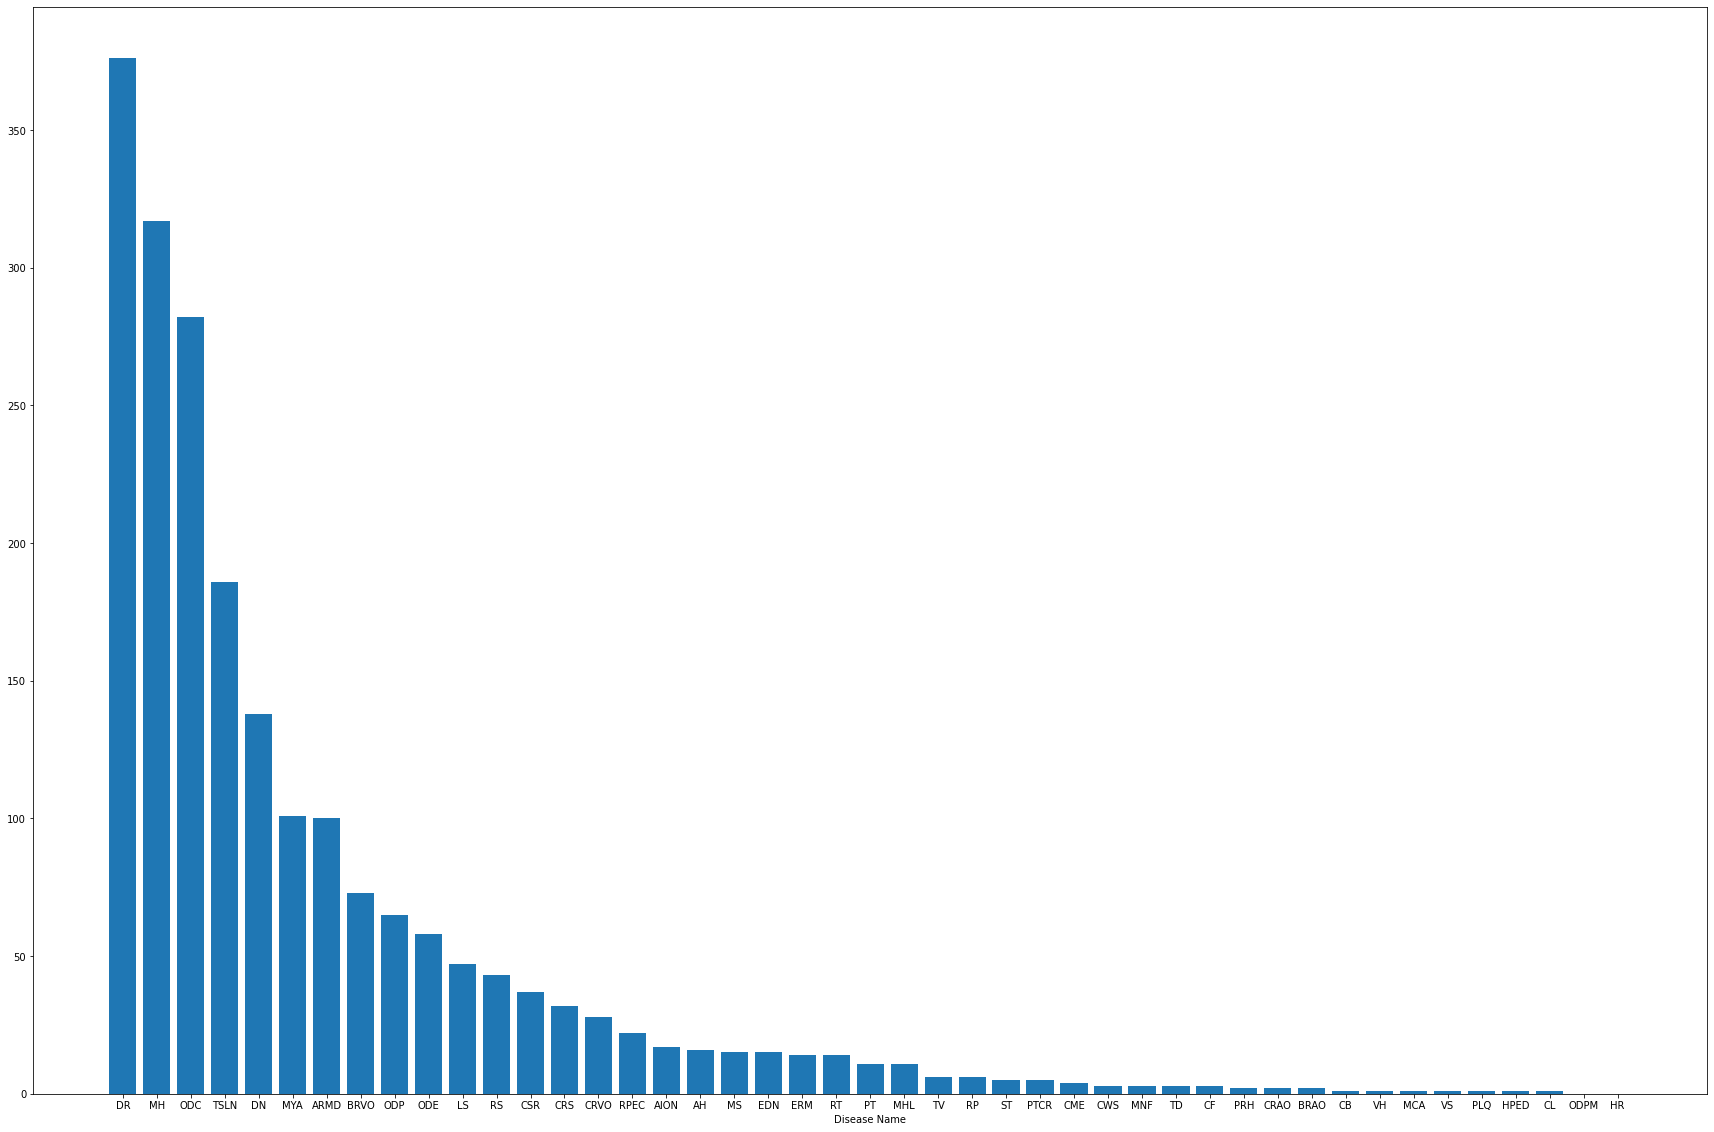

Mostrarlas de forma ordenada en grafica Notas: Jugar con las cantidades de cada una de las diferentes utilizar la matriz de confusion y observar guardar todos los tipos de formato y buscar un valor unico en tamaño para estandarizar.

Existen 47 clases diferentes donde tiene una ID y 46 enfermedades diferentes.

Se piensa realizar una sumatoria de las diferentes clases para dar una idea de cuantas imagenes se tienen de cada categoria ademas de ver cuantas retinas son sanas y cuantas tienen una enfermedad. De acuerdo con lo obtenido de esto se podra dar una idea de cuales enfermedades no se tienen en cuenta y asi

In [ ]:
#AQUI ESTAS En esta seccion se mostro las caracteristicas de cada una de las imagenes. Primero se muestra la de training


folder_images = "Datos\\Training_Set\\Training"
dict_imagenes_train = dict()

for dirpath, _, filenames in os.walk(folder_images):
    for path_image in filenames:
        image = os.path.abspath(os.path.join(dirpath, path_image))
        with Image.open(image) as img:
            width, heigth = img.size
            dict_imagenes_train[path_image] = {'width': width, 'heigth': heigth}
print(dict_imagenes_train)

In [ ]:
type(dict_imagenes_train)
df_train = pd.DataFrame(dict_imagenes_train)
df_train = df_train.T.reset_index(drop=True)
df_train

In [ ]:
df_train.groupby(df_train.columns.tolist(),as_index=False).size() # cuenta cuantos hay de cada uno. Pero se ve mejor en la tablita
#tablas de documento

In [ ]:
tam_train = df_train.groupby(['heigth', 'width']).size().reset_index().rename(columns={0:'count'})
tam_train.plot.scatter(x='width', y='heigth');
plt.title('Tamaño Imagenes Training')

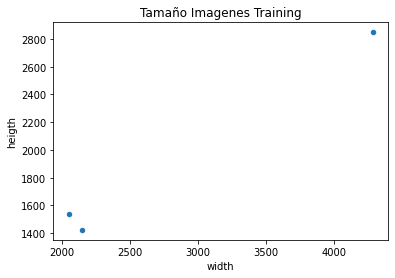

In [ ]:
#En esta seccion se mostro las caracteristicas de cada una de las imagenes. Se muestra Test
folder_images = "Datos\\Test_Set\\Test"
dict_imagenes_test = dict()

for dirpath, _, filenames in os.walk(folder_images):
    for path_image in filenames:
        image = os.path.abspath(os.path.join(dirpath, path_image))
        with Image.open(image) as img:
            width, heigth = img.size
            dict_imagenes_test[path_image] = {'width': width, 'heigth': heigth}
print(dict_imagenes_test)

In [ ]:
type(dict_imagenes_test)
df_test = pd.DataFrame(dict_imagenes_test)
df_test = df_test.T.reset_index(drop=True)
df_test
df_test.groupby(df_test.columns.tolist(),as_index=False).size() # cuenta cuantos hay de cada uno. Pero se ve mejor en la tablita


In [ ]:
tam_test = df_test.groupby(['heigth', 'width']).size().reset_index().rename(columns={0:'count'})
tam_test.plot.scatter(x='width', y='heigth');
plt.title('Tamaño Imagenes Test')

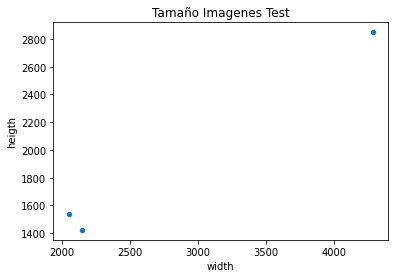

In [ ]:
##En esta seccion se mostro las caracteristicas de cada una de las imagenes. Se muestra la de Validation
folder_images = "Datos\\Evaluation_Set\\Validation"
dict_imagenes_val = dict()


for dirpath, _, filenames in os.walk(folder_images):
    for path_image in filenames:
        image = os.path.abspath(os.path.join(dirpath, path_image))
        with Image.open(image) as img:
            width, heigth = img.size
            dict_imagenes_val[path_image] = {'width': width, 'heigth': heigth}
print(dict_imagenes_val)

In [ ]:
type(dict_imagenes_val)
df_val = pd.DataFrame(dict_imagenes_val)
df_val = df_val.T.reset_index(drop=True)
df_val

In [ ]:
df_val.groupby(df_val.columns.tolist(),as_index=False).size() # cuenta cuantos hay de cada uno. Pero se ve mejor en la tablita

In [ ]:
tam_val = df_val.groupby(['heigth', 'width']).size().reset_index().rename(columns={0:'count'})
tam_val.plot.scatter(x='width', y='heigth');
plt.title('Tamaño Imagenes Validation')

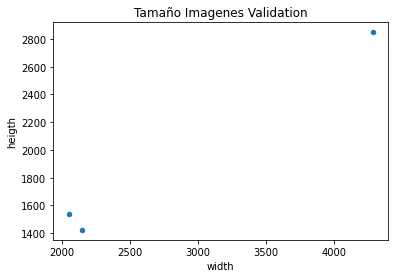

## Preparacion

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import numpy as np
import itertools
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root2="/content/drive/MyDrive/Datos_Tesis/Training"
dirlist2 = [ item for item in os.listdir(root2) if os.path.isdir(os.path.join(root2, item)) ]
print(dirlist2) 

['DR', 'MH', 'ODC', 'TSLN']


In [ ]:
root="/content/drive/MyDrive/Datos_Tesis/Test"
dirlist = [ item for item in os.listdir(root) if os.path.isdir(os.path.join(root, item)) ]
print(dirlist)

# ["SANO","DR","ARMD","MH","DN","MYA","BRVO","TSLN","ERM","LS","MS","CSR","ODC","CRVO","TV","AH","ODP","ODE","ST","AION","PT","RT","RS","CRS","EDN","RPEC","MHL","RP","CWS","CB","PRH","MNF","CRAO","TD","CME","PTCR","CF","VH","MCA","VS","BRAO","PLQ","HPED","CL"]
#['SANO', 'DR', 'ODC', 'MH', 'DN', 'TSLN', 'MYA', 'ODE', 'ARMD', 'BRVO', 'ODP', 'RS', 'CRVO', 'CSR', 'CRS', 'LS', 'EDN', 'AH', 'MS', 'AION', 'RPEC', 'MHL', 'RT', 'PT', 'TV', 'ERM', 'RP', 'CME', 'CWS', 'ST', 'CF', 'PRH', 'TD', 'VH', 'CB', 'CL']

['DR', 'ODC', 'MH', 'TSLN']


In [ ]:
con_folder = set(dirlist2).intersection(dirlist)
print(con_folder)
print(len(con_folder))
 
temp3 = []
for element in dirlist2:
    if element not in dirlist:
        temp3.append(element)
 
print(temp3)
print(len(temp3))

{'MH', 'DR', 'TSLN', 'ODC'}
4
[]
0


In [ ]:
# sin aumento de datos
train_path = "/content/drive/MyDrive/Datos_Tesis/Training"
test_path = "/content/drive/MyDrive/Datos_Tesis/Test"

train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory = train_path, 
                     target_size = (224,224), 
                     classes =dirlist2, 
                     batch_size = 20)

test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, 
                                                                                             target_size=(224,224), 
                                                                                             classes=dirlist, 
                                                                                             batch_size=10, 
                                                                                             shuffle=False)

Found 1161 images belonging to 4 classes.
Found 372 images belonging to 4 classes.


[0 0 0 ... 3 3 3]


In [ ]:
#con aumneto de datos
#train_path = "/content/drive/MyDrive/Datos_Tesis/Training"
#test_path = "/content/drive/MyDrive/Datos_Tesis/Test"

#train_batches = ImageDataGenerator(rotation_range=40,
 #       width_shift_range=0.2,
  #      height_shift_range=0.2,
   #     rescale=1./255,
#        shear_range=0.2,
#        zoom_range=0.2,
 #       horizontal_flip=True,
 #       fill_mode='nearest',
  #  preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory = train_path, 
   #                  target_size = (224,224), 
    #                 classes =dirlist2, 
     #                batch_size = 20)

#test_batches = ImageDataGenerator(rescale=1./255,
 #   preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, 
  #                                                                                           target_size=(224,224), 
   #                                                                                          classes=dirlist, 
    #                                                                                         batch_size=10, 
     #                                                                                        shuffle=False)

rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'

## VGG16 No Pretrained

In [ ]:
# Se obtuvo del github de VGG16
# https://github.com/ashushekar/VGG16
# Generate the model
model = Sequential()
# Layer 1: Convolutional
model.add(Conv2D(input_shape=(224, 224, 3), filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
# Layer 2: Convolutional
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 3: MaxPooling
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Layer 4: Convolutional
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 5: Convolutional
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 6: MaxPooling
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Layer 7: Convolutional
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 8: Convolutional
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 9: Convolutional
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 10: MaxPooling
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Layer 11: Convolutional
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 12: Convolutional
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 13: Convolutional
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 14: MaxPooling
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Layer 15: Convolutional
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 16: Convolutional
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 17: Convolutional
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 18: MaxPooling
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Layer 19: Flatten
model.add(Flatten())
# Layer 20: Fully Connected Layer
model.add(Dense(units=4096, activation='relu'))
# Layer 21: Fully Connected Layer
model.add(Dense(units=4096, activation='relu'))
# Layer 22: Sigmoid Layer
model.add(Dense(units=44, activation='sigmoid')) #was softmax but need to use sigmoid for multilabel classification

In [ ]:
optimizer = Adam(learning_rate = 0.001)
model.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [ ]:
test  = model.fit(x = train_batches, validation_data = test_batches, epochs = 5)

Epoch 1/5
 14/124 [==>...........................] - ETA: 1:08:59 - loss: 0.0860 - accuracy: 0.1370

In [ ]:
test2 = model.fit(x = train_batches, validation_data = test_batches, epochs = 5)

## VGG16 Pre trained

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

https://towardsdatascience.com/transfer-learning-with-vgg16-and-keras-50ea161580b4

https://medium.com/@kenneth.ca95/a-guide-to-transfer-learning-with-keras-using-resnet50-a81a4a28084b

In [ ]:
## Loading VGG16 model
base_model = VGG16(weights="imagenet")
base_model.trainable = False ## Not trainable weights

553467096/553467096 [==============================] - 5s 0us/step


train_path = "/content/drive/MyDrive/Datos_tesis/Categorias_train"
test_path = "/content/drive/MyDrive/Datos_tesis/Categorias_test"

train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory = train_path, 
                     target_size = (224,224), 
                     classes =['DN','DR','MH','ODC','SANO','TSLN'], 
                     batch_size = 20)

test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, 
                                                                                             target_size=(224,224), 
                                                                                             classes=['DN','DR','MH','ODC','SANO','TSLN'], 
                                                                                             batch_size=10, 
                                                                                             shuffle=False)

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
#data_augmentation = tf.keras.Sequential([
 #                           layers.experimental.preprocessing.Rescaling(1./255),
 #                           layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
 #                           layers.experimental.preprocessing.RandomRotation((-0.2, 0.3))
#])

#data_augmentation1 = layers.experimental.preprocessing.Rescaling(1./255)
#data_augmentation2 = layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical")
#data_augmentation3 = layers.experimental.preprocessing.RandomRotation((-0.2, 0.3))@

In [ ]:
from tensorflow.keras import layers, models



flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(units=4096, activation='relu')
dense_layer_2 = layers.Dense(units=4096, activation='relu')
prediction_layer = layers.Dense(4, activation='sigmoid')


base_model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])


base_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 dense_3 (Dense)             (None, 4096)              4100096   
                                                                 
 dense_4 (Dense)             (None, 4096)              16781312  
                                                                 
 dense_5 (Dense)             (None, 4)                 16388     
                                                                 
Total params: 159,255,340
Trainable params: 20,897,796
Non-trainable params: 138,357,544
_________________________________________________________________


In [ ]:
#sin data augmentation pero con con 36 clases. 
from tensorflow.keras.callbacks import EarlyStopping

base_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

base_model.fit(x = train_batches, validation_data = test_batches, epochs=10, validation_split=0.2, batch_size=32, callbacks=[es])

#base_model.fit(x = train_batches, epochs=2, validation_split=0.2, batch_size=32, callbacks=[es])


Epoch 1/10
123/123 [==============================] - 2161s 18s/step - loss: 2.4991 - accuracy: 0.2893 - val_loss: 3.4072 - val_accuracy: 0.0985
Epoch 2/10
123/123 [==============================] - 2154s 18s/step - loss: 2.4214 - accuracy: 0.3138 - val_loss: 3.5089 - val_accuracy: 0.0673
Epoch 3/10
123/123 [==============================] - 2150s 17s/step - loss: 2.3931 - accuracy: 0.3162 - val_loss: 3.5329 - val_accuracy: 0.0387
Epoch 4/10
123/123 [==============================] - 2143s 17s/step - loss: 2.3594 - accuracy: 0.3289 - val_loss: 3.4783 - val_accuracy: 0.0823
Epoch 5/10
123/123 [==============================] - 2123s 17s/step - loss: 2.3291 - accuracy: 0.3337 - val_loss: 3.4147 - val_accuracy: 0.0436
Epoch 6/10
123/123 [==============================] - 2117s 17s/step - loss: 2.3066 - accuracy: 0.3252 - val_loss: 3.6162 - val_accuracy: 0.0910


Otra opcion para el learning rate
from tensorflow.keras.callbacks import EarlyStopping
Optimizer = Adam(learning_rate = 0.0001)
model.compile(
    optimizer=Optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)           


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

model.fit(x = train_batches, validation_data = test_batches, epochs=2, validation_split=0.2, batch_size=32, callbacks=[es])

In [ ]:
#Sin data augmentation pero con 21 clases
from tensorflow.keras.callbacks import EarlyStopping

base_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

checkpoint_path = '/content/drive/MyDrive/VGG16_21_categorias'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

base_model.fit(x = train_batches, validation_data = test_batches, epochs=10, validation_split=0.2, batch_size=32, callbacks=[es, cp_callback])

#base_model.fit(x = train_batches, epochs=2, validation_split=0.2, batch_size=32, callbacks=[es])

base_model.save('/content/drive/MyDrive/VGG16_21_categorias')

Epoch 1/10
119/119 [==============================] - ETA: 0s - loss: 2.4262 - accuracy: 0.2680 
Epoch 1: saving model to /content/drive/MyDrive/VGG16_21_categorias
119/119 [==============================] - 2246s 19s/step - loss: 2.4262 - accuracy: 0.2680 - val_loss: 3.1911 - val_accuracy: 0.0614
Epoch 2/10
119/119 [==============================] - ETA: 0s - loss: 2.2069 - accuracy: 0.3411 
Epoch 2: saving model to /content/drive/MyDrive/VGG16_21_categorias
119/119 [==============================] - 2119s 18s/step - loss: 2.2069 - accuracy: 0.3411 - val_loss: 3.2813 - val_accuracy: 0.0941
Epoch 3/10
119/119 [==============================] - ETA: 0s - loss: 2.1488 - accuracy: 0.3432 
Epoch 3: saving model to /content/drive/MyDrive/VGG16_21_categorias
119/119 [==============================] - 2139s 18s/step - loss: 2.1488 - accuracy: 0.3432 - val_loss: 3.5424 - val_accuracy: 0.0484
Epoch 4/10
119/119 [==============================] - ETA: 0s - loss: 2.0516 - accuracy: 0.3651 
Epoch 

In [ ]:
#Sin data augmentation pero con 15 clases
from tensorflow.keras.callbacks import EarlyStopping

base_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

checkpoint_path = '/content/drive/MyDrive/VGG16_15_categorias'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

base_model.fit(x = train_batches, validation_data = test_batches, epochs=10, validation_split=0.2, batch_size=32, callbacks=[es, cp_callback])

#base_model.fit(x = train_batches, epochs=2, validation_split=0.2, batch_size=32, callbacks=[es])

base_model.save('/content/drive/MyDrive/VGG16_15_categorias')

Epoch 1/10
113/113 [==============================] - ETA: 0s - loss: 2.3605 - accuracy: 0.2172 
Epoch 1: saving model to /content/drive/MyDrive/VGG16_15_categorias
113/113 [==============================] - 2886s 25s/step - loss: 2.3605 - accuracy: 0.2172 - val_loss: 2.8668 - val_accuracy: 0.0738
Epoch 2/10
113/113 [==============================] - ETA: 0s - loss: 2.2296 - accuracy: 0.2660 
Epoch 2: saving model to /content/drive/MyDrive/VGG16_15_categorias
113/113 [==============================] - 2073s 18s/step - loss: 2.2296 - accuracy: 0.2660 - val_loss: 2.7462 - val_accuracy: 0.0806
Epoch 3/10
113/113 [==============================] - ETA: 0s - loss: 2.1509 - accuracy: 0.3223 
Epoch 3: saving model to /content/drive/MyDrive/VGG16_15_categorias
113/113 [==============================] - 2136s 19s/step - loss: 2.1509 - accuracy: 0.3223 - val_loss: 3.1482 - val_accuracy: 0.0915
Epoch 4/10
113/113 [==============================] - ETA: 0s - loss: 2.1030 - accuracy: 0.3409 
Epoch 

In [ ]:
#sin data augmentation pero con con 7 clases. 
from tensorflow.keras.callbacks import EarlyStopping

base_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

base_model.fit(x = train_batches, validation_data = test_batches, epochs=10, callbacks=[es])

#base_model.fit(x = train_batches, epochs=2, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/10
75/75 [==============================] - 1326s 18s/step - loss: 1.5827 - accuracy: 0.4280 - val_loss: 2.1044 - val_accuracy: 0.2703
Epoch 2/10
75/75 [==============================] - 1313s 17s/step - loss: 1.5243 - accuracy: 0.4340 - val_loss: 2.0744 - val_accuracy: 0.2640
Epoch 3/10
75/75 [==============================] - 1332s 18s/step - loss: 1.4937 - accuracy: 0.4313 - val_loss: 2.1021 - val_accuracy: 0.2661
Epoch 4/10
75/75 [==============================] - 1370s 18s/step - loss: 1.4548 - accuracy: 0.4520 - val_loss: 2.2696 - val_accuracy: 0.2703
Epoch 5/10
75/75 [==============================] - 1321s 18s/step - loss: 1.4104 - accuracy: 0.4700 - val_loss: 2.1432 - val_accuracy: 0.2952
Epoch 6/10
75/75 [==============================] - 1364s 18s/step - loss: 1.3817 - accuracy: 0.4747 - val_loss: 2.3669 - val_accuracy: 0.2620
Epoch 7/10
75/75 [==============================] - 1319s 18s/step - loss: 1.3862 - accuracy: 0.4780 - val_loss: 2.2221 - val_accuracy: 0.2723

In [ ]:
#Con data augmentation pero con 21 clases
from tensorflow.keras.callbacks import EarlyStopping

base_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

base_model.fit(x = train_batches, validation_data = test_batches, epochs=10, validation_split=0.2, batch_size=32, callbacks=[es])

#base_model.fit(x = train_batches, epochs=2, validation_split=0.2, batch_size=32, callbacks=[es])

In [ ]:
#sin data augmentation pero con 4 clases. 
from tensorflow.keras.callbacks import EarlyStopping

base_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

base_model.fit(x = train_batches, validation_data = test_batches, epochs=10, callbacks=[es])

#base_model.fit(x = train_batches, epochs=2, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/10
59/59 [==============================] - 1101s 19s/step - loss: 1.3072 - accuracy: 0.3807 - val_loss: 1.5585 - val_accuracy: 0.3172
Epoch 2/10
59/59 [==============================] - 1069s 18s/step - loss: 1.1922 - accuracy: 0.4927 - val_loss: 1.5241 - val_accuracy: 0.3387
Epoch 3/10
59/59 [==============================] - 1061s 18s/step - loss: 1.1195 - accuracy: 0.5237 - val_loss: 1.6446 - val_accuracy: 0.3280
Epoch 4/10
59/59 [==============================] - 1072s 18s/step - loss: 1.0876 - accuracy: 0.5366 - val_loss: 1.7205 - val_accuracy: 0.2204
Epoch 5/10
59/59 [==============================] - 1054s 18s/step - loss: 1.0583 - accuracy: 0.5590 - val_loss: 1.8121 - val_accuracy: 0.3306
Epoch 6/10
59/59 [==============================] - 1061s 18s/step - loss: 1.0572 - accuracy: 0.5538 - val_loss: 1.7402 - val_accuracy: 0.3280
Epoch 7/10
59/59 [==============================] - 1091s 19s/step - loss: 1.0073 - accuracy: 0.5728 - val_loss: 1.6450 - val_accuracy: 0.3306

In [ ]:
bmodel = base_model.fit(x = train_batches, validation_data = test_batches, epochs=1, callbacks=[es])

AttributeError: ignored

In [ ]:
# con 4 clases
import sklearn.metrics as skm
Y_pred2 = base_model.predict(test_batches, 481 // 32 )
y_pred2 = np.argmax(Y_pred2, axis=1)
y_true = test_batches.classes
y_true
print('Confusion Matrix')
print(skm.multilabel_confusion_matrix(y_true, y_pred2))

#[1 'DR', 2 'MH',3  'ODC', 4  'TSLN']

38/38 [==============================] - 273s 7s/step
Confusion Matrix
[[[168  80]
  [ 25  99]]

 [[219  62]
  [ 86   5]]

 [[218  50]
  [ 95   9]]

 [[267  52]
  [ 38  15]]]


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


TypeError: ignored

In [ ]:
con_matrix2 = skm.multilabel_confusion_matrix(y_true, y_pred2)
skm.classification_report(y_true,y_pred2)

'              precision    recall  f1-score   support\n\n           0       0.55      0.80      0.65       124\n           1       0.07      0.05      0.06        91\n           2       0.15      0.09      0.11       104\n           3       0.22      0.28      0.25        53\n\n    accuracy                           0.34       372\n   macro avg       0.25      0.31      0.27       372\nweighted avg       0.28      0.34      0.30       372\n'

In [ ]:
#cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = skm.ConfusionMatrixDisplay(confusion_matrix=con_matrix2)

In [ ]:
generator = test_batches
label_map = (generator.class_indices)

In [ ]:
print(label_map)

{'DR': 0, 'ODC': 1, 'MH': 2, 'TSLN': 3}


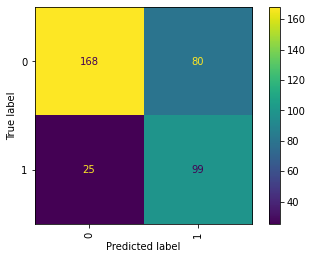

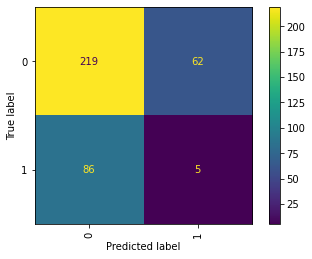

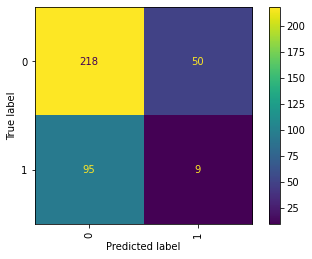

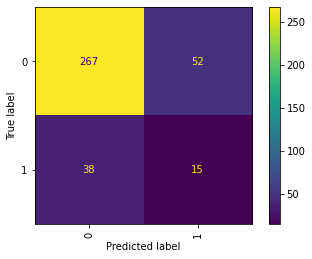

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_matrices = con_matrix2
for confusion_matrix in confusion_matrices:
    disp = ConfusionMatrixDisplay(confusion_matrix)
    disp.plot(include_values=True, cmap="viridis", ax=None, xticks_rotation="vertical")
    plt.show()

In [ ]:
plt.show()

## RestNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input


In [ ]:
## Loading ResNet50 model
res_model = ResNet50(weights="imagenet")
res_model.trainable = False ## Not trainable weights

102967424/102967424 [==============================] - 1s 0us/step


In [ ]:
res_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(units=4096, activation='relu')
dense_layer_2 = layers.Dense(units=4096, activation='relu')
prediction_layer = layers.Dense(4, activation='sigmoid')


res_model = models.Sequential([
    res_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])


res_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 4096)              4100096   
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dense_2 (Dense)             (None, 4)                 16388     
                                                                 
Total params: 46,534,508
Trainable params: 20,897,796
Non-trainable params: 25,636,712
_________________________________________________________________


In [ ]:
#resnet50 sin data augmentation pero con con 21 clases. 
from tensorflow.keras.callbacks import EarlyStopping

res_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

res_model.fit(x = train_batches, validation_data = test_batches, epochs=2, validation_split=0.2, batch_size=32, callbacks=[es])

#res_model.fit(x = train_batches, epochs=2, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/2
119/119 [==============================] - 971s 8s/step - loss: 2.3968 - accuracy: 0.2752 - val_loss: 3.1125 - val_accuracy: 0.0745
Epoch 2/2
119/119 [==============================] - 905s 8s/step - loss: 2.2072 - accuracy: 0.3297 - val_loss: 3.4357 - val_accuracy: 0.0863


In [ ]:
#resnet50 sin data augmentation pero con con 21 clases. 
from tensorflow.keras.callbacks import EarlyStopping

res_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)
       
res_model.fit(x = train_batches, validation_data = test_batches, epochs=15, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/15
119/119 [==============================] - 1338s 11s/step - loss: 2.2998 - accuracy: 0.3128 - val_loss: 3.2018 - val_accuracy: 0.0837
Epoch 2/15
119/119 [==============================] - 937s 8s/step - loss: 2.1587 - accuracy: 0.3453 - val_loss: 3.1487 - val_accuracy: 0.0928
Epoch 3/15
119/119 [==============================] - 930s 8s/step - loss: 2.0536 - accuracy: 0.3584 - val_loss: 3.5968 - val_accuracy: 0.0797
Epoch 4/15
119/119 [==============================] - 923s 8s/step - loss: 1.9686 - accuracy: 0.3900 - val_loss: 3.6331 - val_accuracy: 0.1072
Epoch 5/15
119/119 [==============================] - 928s 8s/step - loss: 1.9082 - accuracy: 0.3997 - val_loss: 3.9305 - val_accuracy: 0.1111
Epoch 6/15
119/119 [==============================] - 927s 8s/step - loss: 1.8422 - accuracy: 0.4234 - val_loss: 3.9849 - val_accuracy: 0.0954
Epoch 7/15
119/119 [==============================] - 925s 8s/step - loss: 1.7842 - accuracy: 0.4301 - val_loss: 3.8789 - val_accuracy: 0.10

TypeError: ignored

In [ ]:
res_model.save("/content/drive/MyDrive/ResNet50_21_categorias")

In [ ]:
#resnet50 sin data augmentation pero con con 7 clases. 
from tensorflow.keras.callbacks import EarlyStopping

res_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)
       
res_model.fit(x = train_batches, validation_data = test_batches, epochs=2, batch_size=32, callbacks=[es])


Epoch 1/2
75/75 [==============================] - 1580s 21s/step - loss: 1.7546 - accuracy: 0.3113 - val_loss: 2.1526 - val_accuracy: 0.2557
Epoch 2/2
75/75 [==============================] - 552s 7s/step - loss: 1.6190 - accuracy: 0.3907 - val_loss: 2.1155 - val_accuracy: 0.2121


In [ ]:
#resnet50 sin data augmentation pero con con 7 clases. Pero 12 epocas
from tensorflow.keras.callbacks import EarlyStopping

res_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)
       
res_model.fit(x = train_batches, validation_data = test_batches, epochs=12, batch_size=32, callbacks=[es])

Epoch 1/12
75/75 [==============================] - 551s 7s/step - loss: 1.5366 - accuracy: 0.4260 - val_loss: 2.2327 - val_accuracy: 0.2536
Epoch 2/12
75/75 [==============================] - 564s 8s/step - loss: 1.4772 - accuracy: 0.4440 - val_loss: 2.2765 - val_accuracy: 0.2578
Epoch 3/12
75/75 [==============================] - 556s 7s/step - loss: 1.4517 - accuracy: 0.4560 - val_loss: 2.3234 - val_accuracy: 0.2786
Epoch 4/12
75/75 [==============================] - 550s 7s/step - loss: 1.3696 - accuracy: 0.4767 - val_loss: 2.4717 - val_accuracy: 0.2994
Epoch 5/12
75/75 [==============================] - 566s 8s/step - loss: 1.3526 - accuracy: 0.4867 - val_loss: 2.1434 - val_accuracy: 0.2786
Epoch 6/12
75/75 [==============================] - 559s 7s/step - loss: 1.3288 - accuracy: 0.4980 - val_loss: 2.2771 - val_accuracy: 0.3077
Epoch 7/12
75/75 [==============================] - 565s 8s/step - loss: 1.2808 - accuracy: 0.5073 - val_loss: 2.4713 - val_accuracy: 0.2973
Epoch 8/12
75

In [ ]:
print(res_model)

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
m = res_model.fit(x = train_batches, validation_data = test_batches, epochs=2, batch_size=32, callbacks=[es])

Epoch 1/2
75/75 [==============================] - 582s 8s/step - loss: 1.1281 - accuracy: 0.5580 - val_loss: 2.7336 - val_accuracy: 0.3077
Epoch 2/2
75/75 [==============================] - 596s 8s/step - loss: 1.0891 - accuracy: 0.5640 - val_loss: 2.9847 - val_accuracy: 0.3202


In [ ]:
Y_pred = res_model.predict(test_batches, 481 // 32 )
y_pred = np.argmax(Y_pred, axis=1)

49/49 [==============================] - 147s 3s/step


In [ ]:
y_true = test_batches.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
print('Confusion Matrix')
print(multilabel_confusion_matrix(y_true, y_pred))
con_matrix = multilabel_confusion_matrix(y_true, y_pred)

Confusion Matrix
[[[298  59]
  [ 46  78]]

 [[238 152]
  [ 68  23]]

 [[373   4]
  [104   0]]

 [[391  44]
  [ 35  11]]

 [[408  20]
  [ 38  15]]

 [[414  35]
  [  9  23]]

 [[437  13]
  [ 27   4]]]



1.   Persona tiene retinopatia X y el modelo lo clasifica con esa retinopatia. 

Esto es un Verdadero Positivo. 
2.   Persona no tiene retinopatia X y el modelo lo clasifica como negativo. 

Esto es un Verdadero Negativo
3.   Persona tiene retinopatia X y el modelo no lo clasifica con esta retinopatia. 

Esto es un Falso Positivo.
4.   Persona no tiene retinopatia X y el modelo la clasifica con esta retinopatia.

Esto es Falso Negativo. 

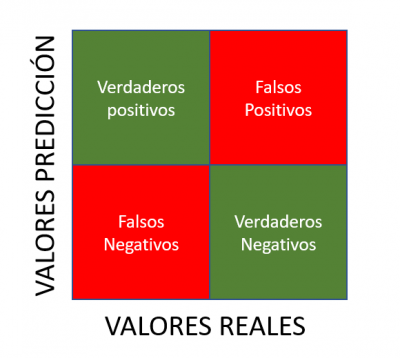



In [ ]:
Y_pred = res_model.predict_generator(validation_generator, 481 // 32)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Cats', 'Dogs', 'Horse']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

NameError: ignored

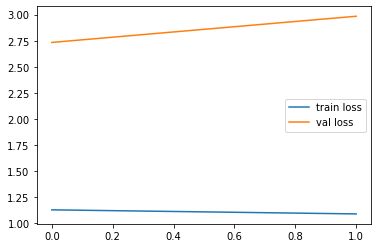

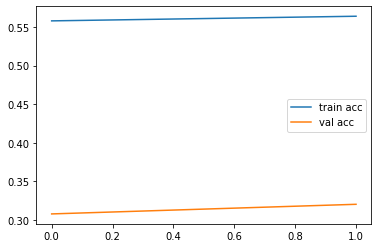

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(m.history['loss'], label='train loss')
plt.plot(m.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(m.history['accuracy'], label='train acc')
plt.plot(m.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
#resnet50 sin data augmentation pero con con 7 clases. 
from tensorflow.keras.callbacks import EarlyStopping

res_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)
       
res_model.fit(x = train_batches, validation_data = test_batches, epochs=22, batch_size=32, callbacks=[es])

Epoch 1/22
75/75 [==============================] - 840s 11s/step - loss: 1.7538 - accuracy: 0.3333 - val_loss: 2.1019 - val_accuracy: 0.2225
Epoch 2/22
75/75 [==============================] - 492s 7s/step - loss: 1.6080 - accuracy: 0.4013 - val_loss: 2.0089 - val_accuracy: 0.2703
Epoch 3/22
75/75 [==============================] - 497s 7s/step - loss: 1.5186 - accuracy: 0.4307 - val_loss: 2.1555 - val_accuracy: 0.2744
Epoch 4/22
75/75 [==============================] - 497s 7s/step - loss: 1.4545 - accuracy: 0.4593 - val_loss: 2.2188 - val_accuracy: 0.2931
Epoch 5/22
75/75 [==============================] - 496s 7s/step - loss: 1.4214 - accuracy: 0.4587 - val_loss: 2.2831 - val_accuracy: 0.2536
Epoch 6/22
75/75 [==============================] - 496s 7s/step - loss: 1.3842 - accuracy: 0.4747 - val_loss: 2.1687 - val_accuracy: 0.3160
Epoch 7/22
75/75 [==============================] - 489s 7s/step - loss: 1.3286 - accuracy: 0.4967 - val_loss: 2.2444 - val_accuracy: 0.3077
Epoch 8/22
7

In [ ]:
#resnet50 sin data augmentation pero con 4 clases. 
from tensorflow.keras.callbacks import EarlyStopping

res_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)
       
res_model.fit(x = train_batches, validation_data = test_batches, epochs=22, batch_size=32, callbacks=[es])

Epoch 1/22
59/59 [==============================] - 671s 11s/step - loss: 1.2883 - accuracy: 0.4126 - val_loss: 1.5314 - val_accuracy: 0.3199
Epoch 2/22
59/59 [==============================] - 443s 7s/step - loss: 1.1453 - accuracy: 0.5116 - val_loss: 1.7189 - val_accuracy: 0.3306
Epoch 3/22
59/59 [==============================] - 437s 7s/step - loss: 1.0662 - accuracy: 0.5685 - val_loss: 1.6196 - val_accuracy: 0.3495
Epoch 4/22
59/59 [==============================] - 434s 7s/step - loss: 1.0908 - accuracy: 0.5375 - val_loss: 1.5775 - val_accuracy: 0.3414
Epoch 5/22
59/59 [==============================] - 440s 7s/step - loss: 1.0532 - accuracy: 0.5607 - val_loss: 1.7427 - val_accuracy: 0.3065
Epoch 6/22
59/59 [==============================] - 437s 7s/step - loss: 1.0142 - accuracy: 0.5659 - val_loss: 1.5645 - val_accuracy: 0.3441
Epoch 7/22
59/59 [==============================] - 439s 7s/step - loss: 0.9661 - accuracy: 0.5943 - val_loss: 1.7337 - val_accuracy: 0.3306
Epoch 8/22
5

In [ ]:
# con 4 clases
import sklearn.metrics as skm
Y_pred = res_model.predict(test_batches, 481 // 32 )
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_batches.classes
y_true
print('Confusion Matrix')
print(skm.multilabel_confusion_matrix(y_true, y_pred))
con_matrix = skm.multilabel_confusion_matrix(y_true, y_pred)
skm.classification_report(y_true,y_pred)
#[1 'DR', 2 'MH',3  'ODC', 4  'TSLN']

38/38 [==============================] - 109s 3s/step
Confusion Matrix
[[[135 113]
  [ 13 111]]

 [[202  79]
  [ 77  14]]

 [[226  42]
  [100   4]]

 [[315   4]
  [ 48   5]]]


'              precision    recall  f1-score   support\n\n           0       0.50      0.90      0.64       124\n           1       0.15      0.15      0.15        91\n           2       0.09      0.04      0.05       104\n           3       0.56      0.09      0.16        53\n\n    accuracy                           0.36       372\n   macro avg       0.32      0.30      0.25       372\nweighted avg       0.31      0.36      0.29       372\n'

In [ ]:
print(skm.classification_report(y_true,y_pred))
#con 4 clases

              precision    recall  f1-score   support

           0       0.50      0.90      0.64       124
           1       0.15      0.15      0.15        91
           2       0.09      0.04      0.05       104
           3       0.56      0.09      0.16        53

    accuracy                           0.36       372
   macro avg       0.32      0.30      0.25       372
weighted avg       0.31      0.36      0.29       372



In [ ]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
test_batches.class_indices  

{'DR': 0, 'ODC': 1, 'MH': 2, 'TSLN': 3}

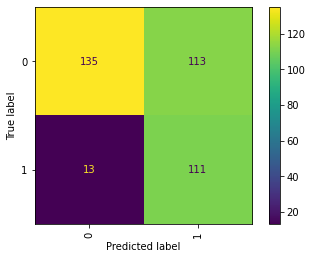

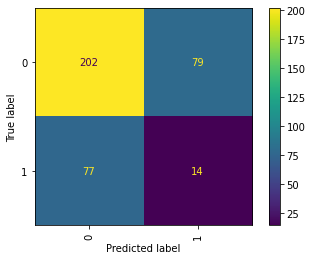

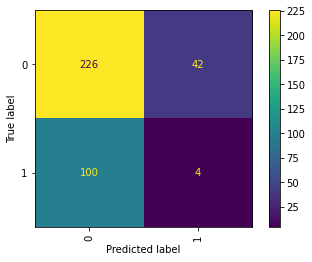

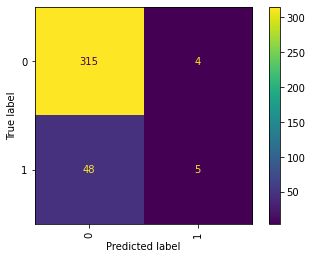

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_matrices = con_matrix
for confusion_matrix in confusion_matrices:
    disp = ConfusionMatrixDisplay(confusion_matrix)
    disp.plot(include_values=True, cmap="viridis", ax=None, xticks_rotation="vertical")
    plt.show()

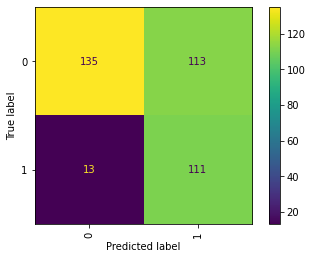

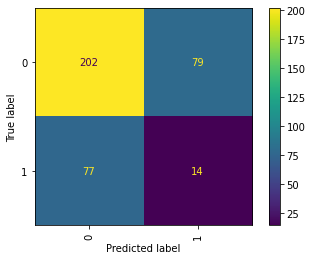

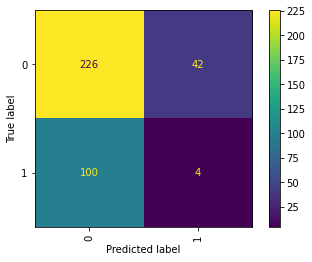

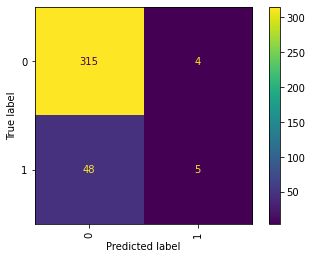

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_matrices = con_matrix
for confusion_matrix in confusion_matrices:
    disp = ConfusionMatrixDisplay(confusion_matrix)
    disp.plot(include_values=True, cmap="viridis", ax=None, xticks_rotation="vertical")
    plt.show()
   # {'DR': 0, 'ODC': 1, 'MH': 2, 'TSLN': 3}